In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# independent variables
cooperativities = [1,1.5,2,2.5,3,3.5,4,5,8,10,15,17,20,30,40,50,80,100,120, 130, 140,150]
kappas = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

In [3]:
# extract data
all_omegas = []
all_deltas = []
all_efficiencies = []

# data is composed as [[omega, delta, efficiency] for each cooperativity]
for kappa in kappas:

    data_set = np.loadtxt(f'tophat 2D, gamma=2pi, t=1gamma^-1, kappa_ratio = {kappa}.gz')

    omega_set = [value[0] for value in data_set]
    all_omegas.append(omega_set)

    # delta values are no particularly well optimised but generally made little difference to the efficiency
    delta_set = [value[1] for value in data_set]
    all_deltas.append(delta_set)

    efficiency_set = [value[2] for value in data_set]
    all_efficiencies.append(efficiency_set)


In [4]:
# define benchmark
bench_efficiencies = [2*C/(2*C+1) for C in cooperativities]
all_bench_efficiencies = [bench_efficiencies] * len(kappas)

Text(0.5, 1.0, '$\\gamma=2\\pi$, $\\sin^2$ pulse, t=1/$\\gamma$')

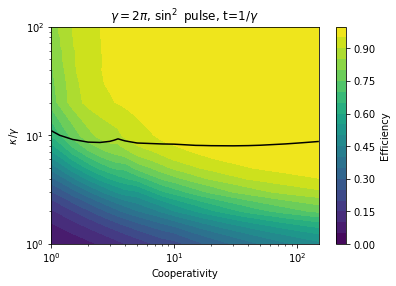

In [5]:
# plot efficiencies

# define grid
X, Y = np.meshgrid(cooperativities, kappas)
num_contours = 20

# efficiency plot
fig, axes = plt.subplots(1,1)
cp = axes.contourf(X,Y, all_efficiencies, levels = num_contours)
axes.set_xscale('log')
axes.set_yscale('log')
cbar = fig.colorbar(cp)
cbar.set_label('Efficiency')

# differential efficiencies
all_efficiency_diffs = []
for j in range(len(kappas)):
    all_efficiency_diffs.append([all_efficiencies[j][k] - all_bench_efficiencies[j][k] for k in range(len(cooperativities))])

# plot 2C/(2C+1) contour
axes.contour(X, Y, all_efficiency_diffs, [0], colors='k')

# add titles
axes.set_xlabel('Cooperativity')
axes.set_ylabel('$\kappa\,/\gamma$')
axes.set_title('$\gamma=2\pi$, tophat pulse, t=1/$\gamma$')

Text(0.5, 1.0, '$\\gamma=2\\pi$, $\\sin^2$ pulse, t=1/$\\gamma$')

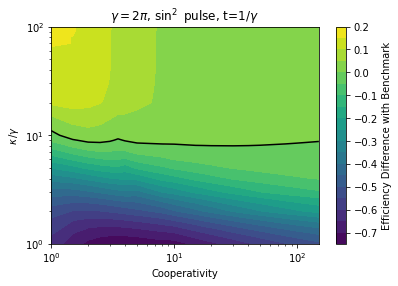

In [6]:
# plot efficiency differences
fig, axes = plt.subplots(1,1)
cp = axes.contourf(X,Y, all_efficiency_diffs, levels = num_contours)
axes.set_xscale('log')
axes.set_yscale('log')
cbar = fig.colorbar(cp)
cbar.set_label('Efficiency Difference with Benchmark')

# plot 2C/(2C+1) contour
axes.contour(X, Y, all_efficiency_diffs, [0], colors='k')

# add titles
axes.set_xlabel('Cooperativity')
axes.set_ylabel('$\kappa\,/\gamma$')
axes.set_title('$\gamma=2\pi$, tophat pulse, t=1/$\gamma$')